# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key
# from api_keys import openweather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Specify API keys and base_URL
openweather_api_key = pd.read_csv("openweather_api_key.csv",header=None).at[0,0]
google_api_key = pd.read_csv("google_api_key.csv",header=None).at[0,0]
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={openweather_api_key}" 
google_base_url = ""

## Generate Cities List

In [64]:
# Make empty lists for city data
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (603)
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
# Create empty list for city data

raw_city_data = []

# Print title to give clear description

print("Beginning Data Retreival")
print('------------------------------')

city_count = 0 
for city in cities:  
    
    #Set a sleep time of 1 second to ensure the API request limit does not exceed 60 per min
    time.sleep(1)
    query_url = f"{base_url}&q={city}"
    weather_response = requests.get(query_url)
    if weather_response.status_code == 404:
        print("City not found. Skipping...")
    if weather_response.status_code == 200:
        city_count+=1
        print(f"Processing Record {city_count} | {city}")   
        weather_json = weather_response.json()
        city_entry = [
            weather_json["name"],
            weather_json["coord"]["lat"],
            weather_json["coord"]["lon"],
            weather_json["main"]["temp_max"],
            weather_json["main"]["humidity"],
            weather_json["clouds"]["all"],
            weather_json["wind"]["speed"],
            weather_json["sys"]["country"],
            weather_json["dt"]
        ]
        raw_city_data.append(city_entry)

print('------------------------------')
print("Data Retreival Complete")
print('------------------------------')

Beginning Data Retreival
------------------------------
Processing Record 1 | bluff
Processing Record 2 | qaanaaq
Processing Record 3 | fairfield
Processing Record 4 | kapaa
Processing Record 5 | cao bang
Processing Record 6 | mataura
Processing Record 7 | padang
Processing Record 8 | martuni
Processing Record 9 | wanaka
Processing Record 10 | berlevag
Processing Record 11 | yellowknife
City not found. Skipping...
Processing Record 12 | east london
Processing Record 13 | bethel
City not found. Skipping...
Processing Record 14 | busselton
Processing Record 15 | saskylakh
Processing Record 16 | rikitea
City not found. Skipping...
Processing Record 17 | georgetown
Processing Record 18 | tolaga bay
Processing Record 19 | yershov
Processing Record 20 | port elizabeth
City not found. Skipping...
Processing Record 21 | komsomolskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 22 | palmerston
Processing Record 23 | vao
Processing Record 24 | castro
Processing Recor

Processing Record 225 | belyy yar
Processing Record 226 | evensk
Processing Record 227 | faanui
City not found. Skipping...
Processing Record 228 | zabaykalsk
Processing Record 229 | dongsheng
City not found. Skipping...
Processing Record 230 | port hardy
Processing Record 231 | eureka
Processing Record 232 | palmer
Processing Record 233 | ilulissat
Processing Record 234 | huntsville
Processing Record 235 | smithers
Processing Record 236 | galdar
Processing Record 237 | leningradskiy
Processing Record 238 | winnemucca
Processing Record 239 | sneek
Processing Record 240 | palana
City not found. Skipping...
Processing Record 241 | lensk
Processing Record 242 | tiksi
Processing Record 243 | port blair
City not found. Skipping...
Processing Record 244 | pathein
City not found. Skipping...
Processing Record 245 | mananara
Processing Record 246 | wajir
Processing Record 247 | bandarbeyla
Processing Record 248 | canico
Processing Record 249 | ballina
Processing Record 250 | tahta
Processing R

Processing Record 453 | kruisfontein
Processing Record 454 | bathsheba
City not found. Skipping...
Processing Record 455 | onguday
Processing Record 456 | algiers
Processing Record 457 | beloha
Processing Record 458 | lufilufi
Processing Record 459 | tahoua
Processing Record 460 | walvis bay
Processing Record 461 | qostanay
Processing Record 462 | haines junction
City not found. Skipping...
Processing Record 463 | linxia
Processing Record 464 | sabak
Processing Record 465 | hambantota
Processing Record 466 | khani
City not found. Skipping...
Processing Record 467 | san cristobal
Processing Record 468 | darhan
Processing Record 469 | bam
Processing Record 470 | cochrane
Processing Record 471 | hervey bay
Processing Record 472 | roma
Processing Record 473 | masvingo
Processing Record 474 | chifeng
City not found. Skipping...
City not found. Skipping...
Processing Record 475 | tilichiki
Processing Record 476 | egvekinot
Processing Record 477 | elizabeth city
Processing Record 478 | ilihan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
#Create data frame 
city_data = pd.DataFrame(raw_city_data, columns=[
    "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"
    ]
)

#Export data into a .csv
city_data.to_csv("city_data.csv", index=True, header=True)
#Display the DataFrame
city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,48.15,76,79,12.12,NZ,1594687808
1,Qaanaaq,77.48,-69.36,43.77,67,2,7.20,GL,1594687809
2,Fairfield,41.27,-73.32,81.00,57,1,5.82,US,1594687811
3,Kapaa,22.08,-159.32,82.40,74,40,14.99,US,1594687812
4,Cao Bang,22.67,106.25,81.59,79,7,2.28,VN,1594687814
5,Mataura,-46.19,168.86,46.09,81,94,3.51,NZ,1594687815
6,Padang,-0.95,100.35,78.66,72,100,3.33,ID,1594687817
7,Martuni,40.14,45.30,57.20,73,86,2.75,AM,1594687818
8,Wanaka,-44.70,169.15,37.99,84,0,1.99,NZ,1594687820
9,Berlevåg,70.86,29.09,45.27,87,20,2.86,NO,1594687822


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [83]:
#  Get the indices of cities that have humidity over 100% and 
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleaned_city_data = city_data.drop(city_data[city_data["Humidity"] > 100].index, inplace=False)

cleaned_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,48.15,76,79,12.12,NZ,1594687808
1,Qaanaaq,77.48,-69.36,43.77,67,2,7.20,GL,1594687809
2,Fairfield,41.27,-73.32,81.00,57,1,5.82,US,1594687811
3,Kapaa,22.08,-159.32,82.40,74,40,14.99,US,1594687812
4,Cao Bang,22.67,106.25,81.59,79,7,2.28,VN,1594687814


In [84]:
# Export the City_Data into a csv

cleaned_city_data.to_csv("cleaned_city_data.csv", index=True, header=True)

#Display the DataFrame
cleaned_city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,48.15,76,79,12.12,NZ,1594687808
1,Qaanaaq,77.48,-69.36,43.77,67,2,7.20,GL,1594687809
2,Fairfield,41.27,-73.32,81.00,57,1,5.82,US,1594687811
3,Kapaa,22.08,-159.32,82.40,74,40,14.99,US,1594687812
4,Cao Bang,22.67,106.25,81.59,79,7,2.28,VN,1594687814
5,Mataura,-46.19,168.86,46.09,81,94,3.51,NZ,1594687815
6,Padang,-0.95,100.35,78.66,72,100,3.33,ID,1594687817
7,Martuni,40.14,45.30,57.20,73,86,2.75,AM,1594687818
8,Wanaka,-44.70,169.15,37.99,84,0,1.99,NZ,1594687820
9,Berlevåg,70.86,29.09,45.27,87,20,2.86,NO,1594687822


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

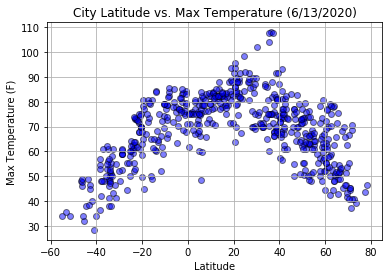

In [95]:
lat_v_temp = plt.scatter(
    cleaned_city_data["Lat"], 
    cleaned_city_data["Max Temp"], 
    marker="o", facecolors="blue", 
    edgecolors="black",
    alpha=0.5)

plt.title("City Latitude vs. Max Temperature (6/13/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(which='both')

## Latitude vs. Humidity Plot

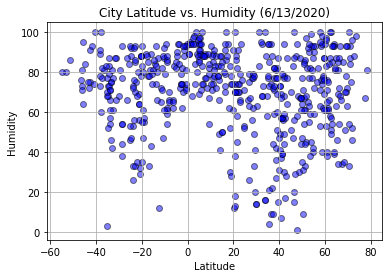

In [99]:
lat_v_humidity = plt.scatter(
    cleaned_city_data["Lat"], 
    cleaned_city_data["Humidity"], 
    marker="o", facecolors="blue", 
    edgecolors="black",
    alpha=0.5)

plt.title("City Latitude vs. Humidity (6/13/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

## Latitude vs. Cloudiness Plot

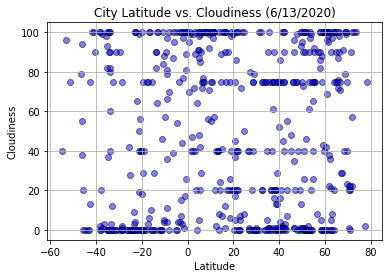

In [100]:
lat_v_cloudiness = plt.scatter(
    cleaned_city_data["Lat"], 
    cleaned_city_data["Cloudiness"], 
    marker="o", facecolors="blue", 
    edgecolors="black",
    alpha=0.5)

plt.title("City Latitude vs. Cloudiness (6/13/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

## Latitude vs. Wind Speed Plot

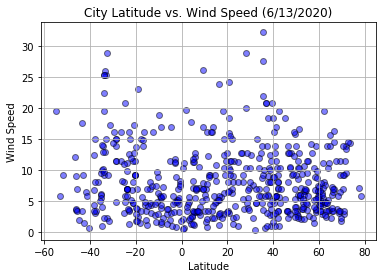

In [101]:
lat_v_WS = plt.scatter(
    cleaned_city_data["Lat"], 
    cleaned_city_data["Wind Speed"], 
    marker="o", facecolors="blue", 
    edgecolors="black",
    alpha=0.5)

plt.title("City Latitude vs. Wind Speed (6/13/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

## Linear Regression

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,48.15,76,79,12.12,NZ,1594687808
1,Qaanaaq,77.48,-69.36,43.77,67,2,7.20,GL,1594687809
2,Fairfield,41.27,-73.32,81.00,57,1,5.82,US,1594687811
3,Kapaa,22.08,-159.32,82.40,74,40,14.99,US,1594687812
4,Cao Bang,22.67,106.25,81.59,79,7,2.28,VN,1594687814


In [109]:
# Create Northern and Southern Hemisphere DataFrames
north = (city_data[city_data["Lat"] >= 0])
south = (city_data[city_data["Lat"] < 0])
north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Qaanaaq,77.48,-69.36,43.77,67,2,7.20,GL,1594687809
2,Fairfield,41.27,-73.32,81.00,57,1,5.82,US,1594687811
3,Kapaa,22.08,-159.32,82.40,74,40,14.99,US,1594687812
4,Cao Bang,22.67,106.25,81.59,79,7,2.28,VN,1594687814
7,Martuni,40.14,45.30,57.20,73,86,2.75,AM,1594687818


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [136]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq

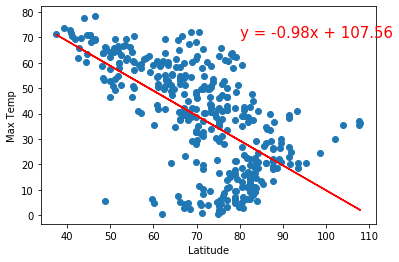

In [139]:
line = regression(north["Max Temp"], north["Lat"])
plt.annotate(line,(80,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('fig1.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

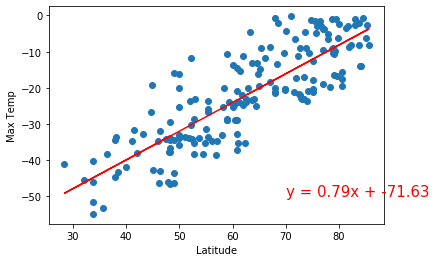

In [150]:
line = regression(south["Max Temp"], south["Lat"])
plt.annotate(line,(70,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('fig2.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

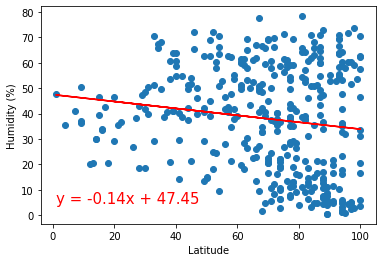

In [153]:
line = regression(north["Humidity"], north["Lat"])
plt.annotate(line,(1,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('fig3.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

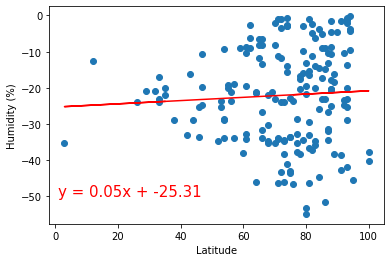

In [155]:
line = regression(south["Humidity"], south["Lat"])
plt.annotate(line,(1,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('fig4.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

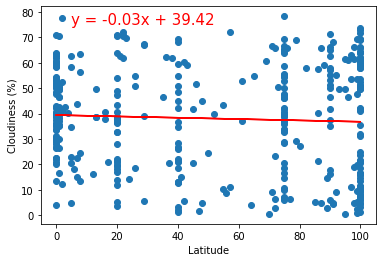

In [167]:
line = regression(north["Cloudiness"], north["Lat"])
plt.annotate(line,(5,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('fig5.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

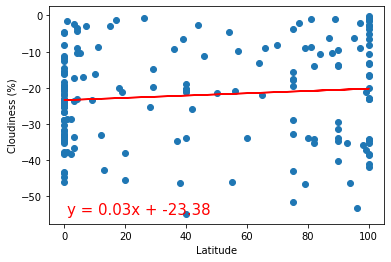

In [158]:
line = regression(south["Cloudiness"], south["Lat"])
plt.annotate(line,(1,-55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('fig6.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

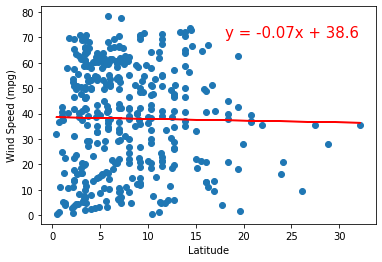

In [163]:
line = regression(north["Wind Speed"], north["Lat"])
plt.annotate(line,(18,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.savefig('fig7.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

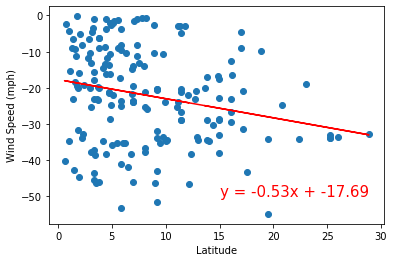

In [165]:
line = regression(south["Wind Speed"], south["Lat"])
plt.annotate(line,(15,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('fig8.png')
plt.show()